## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [39]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [40]:
df= pd.read_csv('ab_data.csv')

b. Use the cell below to find the number of rows in the dataset.

In [41]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [42]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [43]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


e. The number of times the `new_page` and `treatment` don't match.

In [44]:
missmatched_df= df.query("(group == 'treatment' and landing_page != 'new_page') or (group != 'treatment' and landing_page == 'new_page')")
missmatched_df.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [45]:
missmatched_df.shape

(3893, 5)

f. Do any of the rows have missing values?

In [46]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [47]:
df2=df.query("(group == 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page == 'old_page')")

In [48]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [49]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [50]:
df2['user_id'].duplicated().sum()

1

In [51]:
df2[df2['user_id'].duplicated()]['user_id'].unique()

array([773192])

c. What is the row information for the repeat **user_id**? 

In [52]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [53]:
df2.drop_duplicates(['user_id'], inplace= True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [54]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [55]:
df2.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [56]:
df2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [57]:
#probability of an individual received a new page => number of of landings on a page over a total no. of rows in a df

len(df2.query("landing_page == 'new_page'")) / len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Explanation:**
from the above answers we see that the average conversion of control group and treatment group are nearly they are all nearly equal to 0.12
and we see that the probability of a user receiving a new page is 0.5 which is not heavy-loaded or biased toward a certain condition
so there's no clear evidence so far on which page recieves more conversions

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:**

**$H_0$**: **$p_{old}$** >=
**$p_{new}$**


**Alt. Hypothesis:**

**$H_1$**: **$p_{old}
$** < 
**$p_{new}$** 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [58]:
p_new=df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [59]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [60]:
n_new = len(df2.query("group == 'treatment' "))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [61]:
n_old= len(df2.query("group == 'control' "))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [62]:
new_page_converted= np.random.choice( [1,0] , size = n_new, p =[p_new, 1-(p_new)] )
new_page_converted

array([0, 0, 0, ..., 1, 0, 0])

In [63]:
len(new_page_converted)

145310

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [64]:
old_page_converted=np.random.choice([ 1 , 0 ] , size=n_old , p=[p_old , 1-p_old])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
len(old_page_converted)

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [66]:
len(new_page_converted) - len(old_page_converted)

36

In [67]:
#Equalizing the no. of rows in each array new_page & old_page in order to have an accurate distribution
new_page_converted = new_page_converted[0:145274]
#len(new_page_converted) Final Check

In [68]:
difference = (new_page_converted/len(new_page_converted)) - (old_page_converted/len(old_page_converted))
difference

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [70]:
p_diffs = []


for i in range(10000):
    new_page_converted= np.random.choice( [1,0] , size = n_new, p =[p_new, 1-(p_new)] )
    old_page_converted= np.random.choice([ 1 , 0 ] , size=n_old , p=[p_old , 1-p_old])
    difference = (new_page_converted.mean() ) - (old_page_converted.mean() )
    p_diffs.append(difference)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    8.,   108.,   549.,  1645.,  2665.,  2669.,  1652.,   569.,
          121.,    14.]),
 array([ -4.47579498e-03,  -3.58242077e-03,  -2.68904656e-03,
         -1.79567235e-03,  -9.02298138e-04,  -8.92392694e-06,
          8.84450284e-04,   1.77782450e-03,   2.67119871e-03,
          3.56457292e-03,   4.45794713e-03]),
 <a list of 10 Patch objects>)

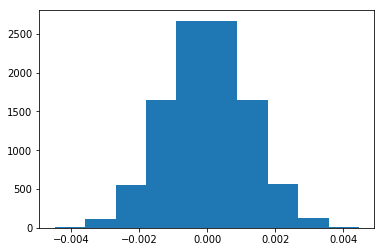

In [71]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [72]:
#Substracting the average of old page conversions from average conversions of new page
actual_difference = (df2.query("group == 'treatment'").converted.mean()) - (df2.query("group == 'control'").converted.mean())
actual_difference

-0.0015782389853555567

In [73]:
# getting an array of every item in p_diffs contating boolean expression whether p_diffs is greater than every item 
#in actual difference or not
prop_array=(p_diffs >actual_difference)
prop_array

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [74]:
#calculating a proportion of p_diffs that are greater than actual difference over all the items in the csv file
prop_array.mean()

0.90639999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**

* this value called p-value in scientific studies
    * sample mean is greater than the actual difference that implies that null hypothesis is true.
    * since we have a large p_value we fail to reject the null hypothesis.
    * we should keep the old page. also it has a slightly better conversion rate
* p_diffs is the simulated difference between new_page_converted & old_page_converted in a random sample repeated 10,000 times
* actual difference is the real difference between new page conversions and old page conversions


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [75]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' ").converted.sum()
convert_new =  df2.query("group == 'treatment' ").converted.sum()
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

print(convert_old, convert_new,n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [76]:
# The above link isn't working, here's an alternative:
#https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html

test_stat, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative= 'larger')

print(test_stat, p_value)


-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

***We fail to reject the Null Hypothesis as test_stat is negative, p_value is nearly similar to the value in part j, so we fail to reject the null hypothesis***

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?



**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
df2['intercept']=1 #intercept column
df2[['control', 'treatment',]]=pd.get_dummies(df2['group']) #creating dummy variables
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [120]:
#Ref:
#https://stackoverflow.com/questions/50966593/how-does-statsmodel-api-predict-works
#https://stackoverflow.com/questions/26528019/python-statsmodel-api-logistic-regression-logit

logit= sm.Logit(df2['converted'], df2[['intercept', 'control']])
logit_model= logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [121]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 05 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:45:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
control        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* the p-value associated with with **ab_page** is 0.190, it's smaller than the value of **Part II** which was 0.905
* it differs from **Part II** because in logistic regression there's intercept and also we test the new_page whether it's equal or not equal to the old page

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* we can consider other factors to the linear regression model like the age of users for instance or homeplace or country
    * **Advantage**: this makes the model more reliable
    
    *  **Disadvantage**: this may bring up unexpected phenomena like 'simpson's paradox' as an example when a trend a appears in a subset of data and appears the opposite of it when the subsets of data are collected again and explored

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [122]:
df3= pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [126]:
#we use set_index as a primary key in df3 and foreign key in df2 exactly the same ways as in SQL databases joins
# how='inner' => inner join between two datasets is the common data in the two data sets only
df_joint=df3.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_joint.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1


In [134]:
#Creating dummy variables

df_joint[['UK', 'US', 'CA']]= pd.get_dummies(df_joint['country'])
df_joint.tail(5)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page,UK,US,CA
user_id,,,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,1,0,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,1,0,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,1,0,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,0,1,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,1,0,0,0,1,0


In [153]:
countries_logit=sm.Logit(df_joint['converted'], df_joint[['intercept', 'UK', 'US']])

# fitting the regression model
countries_logit_model= countries_logit.fit()
countries_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:               1.521e-05
Time:                        00:03:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK            -0.0408      0.027     -1.518      0.129      -0.093       0.012
US             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [154]:
countries_logit=sm.Logit(df_joint['converted'], df_joint[['intercept', 'UK', 'US', 'ab_page']])

# fitting the regression model
countries_logit_model= countries_logit.fit()
countries_logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        00:03:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

**Conclusion:**
* We fail to reject the null hypothesis and we should keep the old page

<a id='conclusions'></a>
## Finishing Up


In [155]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0